In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
%matplotlib inline

In [4]:
#loading the dataset
from google.colab import files
uploaded = files.upload()

Saving test_O6kKpvt.csv to test_O6kKpvt.csv
Saving train_20D8GL3.csv to train_20D8GL3.csv


In [5]:

#decoding the files as uploaded will be a dictionary of keys (the file names) and values (the encoded file objects)
tr1 = pd.read_csv(io.StringIO(uploaded['train_20D8GL3.csv'].decode('utf-8')))
print(tr1.shape)
tr1.head()


(21000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [6]:
print(tr1.shape)
tr1.drop('ID', axis = 1, inplace = True)
print(tr1.shape)
tr1.isnull().sum()

(21000, 25)
(21000, 24)


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [0]:
# Below, we separate our target variable from our dataset. 
X = tr1.drop(['default_payment_next_month'], axis=1)
y = tr1['default_payment_next_month']

In [8]:
# Let's then put 85% of our dataset into a training set and 15% of it into a test set. 
# We can use random_state because it is not a time series dataset that we are using.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
X_train.shape

(16800, 23)

In [9]:
print(y_train.value_counts())

0    13085
1     3715
Name: default_payment_next_month, dtype: int64


In [10]:
print(y_test.value_counts())

0    3270
1     930
Name: default_payment_next_month, dtype: int64


In [27]:
### LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV
est = lgb.LGBMClassifier(metric = 'l1', num_iterations = 60)

param_grid = {
    'n_estimators': [x for x in range(20,30,2)],
    'learning_rate': [0.1,0.2],
    'max_depth': [6,7,8],
    'boosting_type' : ['gbdt'],
    'random_state' : [21],
    'colsample_bytree':  [0.85,0.9,1],  #[x for x in range(0.8,1.0,0.1)],
    'subsample': [0.85,0.9,1],  #[x for x in range(0.8,1.0,0.1)],
    'reg_alpha' : [0.2,0.3,0.8],
    'reg_lambda' : [0.2,0.3,0.8,],  #[x for x in range(0.2,0.9,0.1)]
    }
gridsearch = GridSearchCV(est, param_grid, n_jobs=-1,cv = 3,verbose=1)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 10)

Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 7290 out of 7290 | elapsed: 20.5min finished
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` 

[1]	valid_0's l1: 0.329295	valid_0's binary_logloss: 0.489718	valid_0's auc: 0.768659
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 0.317641	valid_0's binary_logloss: 0.468749	valid_0's auc: 0.783359
[3]	valid_0's l1: 0.307952	valid_0's binary_logloss: 0.454547	valid_0's auc: 0.789808
[4]	valid_0's l1: 0.300076	valid_0's binary_logloss: 0.44543	valid_0's auc: 0.790815
[5]	valid_0's l1: 0.293727	valid_0's binary_logloss: 0.438632	valid_0's auc: 0.791281
[6]	valid_0's l1: 0.288836	valid_0's binary_logloss: 0.434214	valid_0's auc: 0.791411
[7]	valid_0's l1: 0.284861	valid_0's binary_logloss: 0.431409	valid_0's auc: 0.791147
[8]	valid_0's l1: 0.281494	valid_0's binary_logloss: 0.429019	valid_0's auc: 0.791342
[9]	valid_0's l1: 0.279027	valid_0's binary_logloss: 0.428007	valid_0's auc: 0.79041
[10]	valid_0's l1: 0.276949	valid_0's binary_logloss: 0.426924	valid_0's auc: 0.790244
[11]	valid_0's l1: 0.274762	valid_0's binary_logloss: 0.425692	valid_0's auc: 0

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      metric='l1', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=60,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_alpha...
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.85, 0.9, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [6, 7, 8],
                         'n_estimators':

In [12]:
print('Best parameters found by grid search are:', gridsearch.best_params_)
print('Best Score', gridsearch.best_score_)

Best parameters found by grid search are: {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 20, 'random_state': 21, 'reg_alpha': 0.8, 'reg_lambda': 0.3, 'subsample': 0.85}
Best Score 0.8223809523809523


In [0]:
best_par.to_csv('best_par.csv', index=False)
files.download('best_par.csv')

best_score.to_csv('best_score.csv', index=False)
files.download('best_score.csv')

In [17]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 25,
                         boosting_type= 'gbdt',
                         colsample_bytree= 1, 
                         max_depth= 7, 
                         random_state= 21,
                         reg_alpha= 0.8,
                         reg_lambda= 0.3,
                         subsample= 0.85
                        )
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.329295	valid_0's binary_logloss: 0.489718	valid_0's auc: 0.768659
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.317641	valid_0's binary_logloss: 0.468749	valid_0's auc: 0.783359
[3]	valid_0's l1: 0.307952	valid_0's binary_logloss: 0.454547	valid_0's auc: 0.789808
[4]	valid_0's l1: 0.300076	valid_0's binary_logloss: 0.44543	valid_0's auc: 0.790815
[5]	valid_0's l1: 0.293727	valid_0's binary_logloss: 0.438632	valid_0's auc: 0.791281
[6]	valid_0's l1: 0.288836	valid_0's binary_logloss: 0.434214	valid_0's auc: 0.791411
[7]	valid_0's l1: 0.284861	valid_0's binary_logloss: 0.431409	valid_0's auc: 0.791147
[8]	valid_0's l1: 0.281494	valid_0's binary_logloss: 0.429019	valid_0's auc: 0.791342
[9]	valid_0's l1: 0.279027	valid_0's binary_logloss: 0.428007	valid_0's auc: 0.79041
[10]	valid_0's l1: 0.276949	valid_0's binary_logloss: 0.426924	valid_0's auc: 0.790244
[11]	valid_0's l1: 0.274762	valid_0's binary_logloss: 0.425692	valid_0's auc: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.2, max_depth=7,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=25, n_jobs=-1, num_leaves=31,
               objective=None, random_state=21, reg_alpha=0.8, reg_lambda=0.3,
               silent=True, subsample=0.85, subsample_for_bin=200000,
               subsample_freq=0)

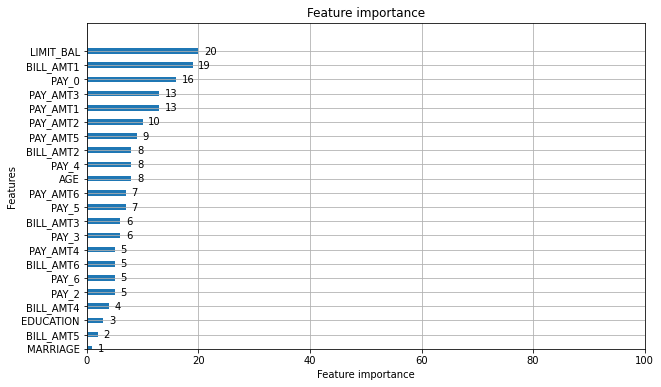

In [18]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [20]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The precision of prediction is:', precision_score(y_test, y_pred))
print('The recall of prediction is:', recall_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.8195238095238095
The roc_auc_score of prediction is: 0.6394100818782678
The roc_auc_score of prediction is: 0.6394100818782678
The precision of prediction is: 0.7067307692307693
The recall of prediction is: 0.3161290322580645
The null acccuracy is: 0.7785714285714286


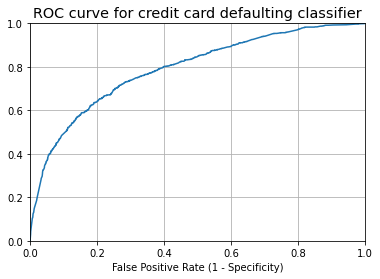

In [21]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [22]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[3148  122]
 [ 636  294]]


In [23]:
tst = pd.read_csv(io.StringIO(uploaded['test_O6kKpvt.csv'].decode('utf-8')))
print(tst.shape)
tst.head()

(9000, 24)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,0,0,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,2,0,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,-2,-2,38395,39943,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,0,0,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,0,0,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [0]:
tst1 = tst.copy()
tst1.drop('ID', axis = 1, inplace = True)
preds = gbm.predict(tst1)

In [0]:
# Prepare submission
subm = pd.DataFrame()
subm['ID'] = tst.ID.values
subm['default_payment_next_month'] = preds
subm.to_csv('submission_lgbm2.csv', index=False)

In [0]:
files.download('submission_lgbm2.csv')